In [2]:
#importo dataset 
from keras.datasets import imdb

In [3]:
#Link al dataset https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [4]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

Num_words=10000 significa que solo mantendra las 10000 palabras mas frecuentes. Se descartaran
las palabras raras. Esto nos permite trabajar con datos vectoriales de manera manejable.

**Las variables train_Data y test_Data son listas de criticas, cada critica es una lista de indices
de palabras(codificando una secuencia de palabras), train_label y test_label son listas de ceros 
y unos, donde 0 es negativo y 1 positivo.**

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
print(len(train_data[0]))
print(len(train_data[10]))
print(len(train_data[18]))

218
450
212


Como vemos cada instancia o critica tiene una tamano diferente debido a que las criticas pueden tener diferente longitud.

In [7]:
train_labels[0] #critica positiva

1

In [8]:
max([max(sequence) for sequence in train_data])# vemos que nos estamos limitando a las 10.000 palabras mas frecuentes

9999

In [9]:
#Para poder decodificar con rapidez una de estas criticas a palabras inglesas:
word_index=imdb.get_word_index()# es un dict que asigna palabras a un indice de enteros

reverse_word_index= dict(
[(value,key) for (key,value) in word_index.items()]) #Lo invierte, asignado indices a palabras

decoded_review=' '.join(
[reverse_word_index.get(i-3,'?') for i in train_data[10]])  #Descodifica la critica
#los indices estan desviados en 3 porque 0 1 y 2 son indices reservados para 'relleno',
#'inicio de secuencia' y 'desconocido'


In [10]:
decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

## PREPARAR LOS DATOS

No podemos introducir listas de enteros en una red neuronal. Tenemos que convertirla a tensores. Hay 2 formas

    -Rellenar las listas para que tengan la misma longitud, convertirlas en un tensor de enteros con la forma
    (muestras, indices_palabras) y despues utilizar como primera capa de la red una capa que pueda manejar esos
    tensores de enteros (la capa embedding que veremos con detalle mas adelante en el libro)
    
    -Utilizar codificacion one-hot en las listas para convertirlas en vectores de ceros y unos.
    Eso supondria, por ejemplo, convertir la secuencia [3,5] en un vector de 10.000 dimensiones que seria todo
    ceros excepto los indices 3 y 5 que serian unos. Despues podra utilizar como primera capa de la red una capa
    dense, para manejar datos vectoriales de punto flotante.

Vamos a utilizar la segunda opcion para vectorizar los datos, algo que haremos de forma manaual para conseguir 
la maxima claridad

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension)) #Crea matriz de 0s 
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.  #pasa indices especificicos de results[i] a unos
    return results

        

In [13]:
x_train=vectorize_sequences(train_data)  # datos de entrenamiento
x_test=vectorize_sequences(test_data) #datos de prueba vectorizados

In [14]:
#Este es el aspecto que tienen ahora las muestras
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

anexo:funcion para convertir estructuas a arrays

https://interactivechaos.com/es/python/function/numpyasarray

In [15]:
#Tambien deberiamos vectorizar las etiquetas, lo cual es bastante simple
y_train=np.asarray(train_labels,dtype='float64')
y_test=np.asarray(test_labels,dtype='float64')

Ahora los datos estan listos para introducirlos en la red neuronal

#### CREAR LA RED

Los datos de entrada son vectores y las etiquetas son escalares(unos y ceros). Esta es la configuracion
mas sencilla con la que nos vamos a encontrar. Un tipo de red que tiene un buen rendimiento en un problema
real asi es una pila sencilla de capas completamente conectadas(Dense) con activaciones relu:Dense(16,activation='relu')
    
El argumento que se pasa a cada capa Dense(16) es el numero de unidades ocultas de la capa. Una unidad oculta es una
dimension en el espacio de representacion de la capa. Quiza recuerde que la activacion relu implementa la siguiente
cadena de operaciones con tensores:
    
    output=relu(dot(W,input)+b)

Tener 16 unidades ocultas significa que la matriz de peso W tendra la forma(input_dimension,16):
    el producto escalar con W proyectara los datos de entrada en un espacio de  representacion de 16
    dimensiones (y despues agregaremos el vector de sesgo b y aplicaremos la operacion relu)
    Podemos entender de forma intuitiva la dimensionalidad de nuestro espacio de representaciones 
    internas. 
    
    Tener mas unidades ocultas (un espacio de representacion mayor) permite a la red
    aprender representaciones mas complejas, pero hace que la red sea mas inasequible a nivel computacional
    y puede llevar al aprendizaje de patrones no deseados (patrones que mejoran el rendimiento con los
    los datos de entrenamiento pero no con los datos de prueba).
    Hay 2 decisiones clave sobre la arquitectura que hay que tomar acerca de una pila de capas Dense:
        
        -Cuantas capas utilizar
        -Cuantas unidades ocultas elegira para cada capa.


#### DEFINICION DEL MODELO

In [16]:
from keras import layers
from keras import models

In [17]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

#### ELECCION DE LA FUNCION DE PERDIDA Y DEL OPTIMIZADOR

Para problemas de clasificacion binaria se usa la funcion binary_cross_entropy. Como optimizador usamos rmsprop

In [18]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Estamos pasando el optimizador, la funcion de perdida y la metrica como cadenas, lo cual es
posible porque rmsprop, binary_crossentropy forman parte de keras.
A veces puede que le interese configurar los parametros del optimizador para pasar una funcion de perdida 
o de metrica personalizada. Lo primero que puede hacerse pasando una instancia de clase optimizadora como
argumento optimizer, como muestra el listado 3.5, lo segundo pasando objetos a la funcion como argumentos
loss y/o metrics como se muestras en el listado 3.6

In [19]:
#listado 3.5

from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
#listado 3.6

from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_crossentropy])

#### VALIDACION DE NUESTRO ENFOQUE

Para monitorizar durante el entrenamiento la exactitud del modelo con datos que no ha visto nunca, crearemos
un conjunto de validacion apartando las 10.000 muestras del conjunto de datos de entrenamiento original.

In [21]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

Ahora vamos a entrenar al modelo para 20 repeticiones (20 iteraciones sobre todas las muestras en los tensores x_train e y_train)
en minilotes de 512 muestras. 

**Al mismo tiempo vamos a monitorizar la perdida y la exactitud en las 10000 muestras que separamos.
Esto se hace pasando los datos de validacion como el argumento validation_data.**

##### ENTRENAR EL MODELO

In [22]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [23]:
history=model.fit(partial_x_train,
                  partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))



Epoch 1/20
30/30 [==============================] - 4s 77ms/step - loss: 0.5440 - accuracy: 0.7725 - val_loss: 0.4212 - val_accuracy: 0.8528
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3354 - accuracy: 0.9001 - val_loss: 0.3238 - val_accuracy: 0.8851
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2403 - accuracy: 0.9275 - val_loss: 0.2878 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1872 - accuracy: 0.9439 - val_loss: 0.2775 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1527 - accuracy: 0.9548 - val_loss: 0.2868 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1241 - accuracy: 0.9653 - val_loss: 0.3026 - val_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1047 - accuracy: 0.9701 - val_loss: 0.2979 - val_accuracy: 0.8866
Epoch 8/20
30

En CPU esto llevara menos de 2 segundos por repeticion, el entrenamiento acaba en 20 segundos.

Al final de cada repeticion, hay una pequena pausa mientras el modelo computa su perdida y su
precision en las 10.000 muestras de los datos de validacion.

Observe que la llamada a model.fit() devuelve un objeto History.

Este objeto tiene un miembro history, que es un diccionario que contiene datos sobre todo lo que ha ocurrido
durante el entrenamiento. Vamos a echarle un vistazo:
    

In [24]:
history_dict=history.history


In [25]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [26]:
history_dict['accuracy']

[0.7724666595458984,
 0.9000666737556458,
 0.9275333285331726,
 0.9439333081245422,
 0.954800009727478,
 0.9653333425521851,
 0.9701333045959473,
 0.9781333208084106,
 0.9827333092689514,
 0.989133358001709,
 0.9914000034332275,
 0.9941999912261963,
 0.9962666630744934,
 0.9976000189781189,
 0.9977333545684814,
 0.9988666772842407,
 0.9986666440963745,
 0.998533308506012,
 0.9995999932289124,
 0.9994000196456909]

El diccionario contiene cuatro entradas una por metrica que se ha monitorizado durante el entrenamiento y 
durante la validacion. Vamos a usar matplotlib para trazar la perdida de entrenamiento y la de validacion,
como tambien la exactitud del entrenamiento y la de la validacion,

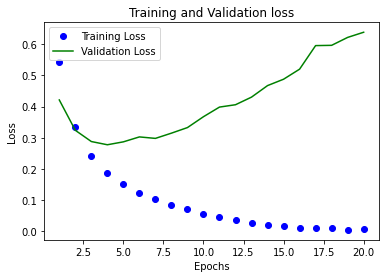

In [27]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss_values,'g',label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



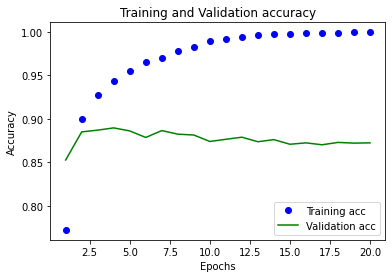

In [28]:
#Trazar la exactitud del entrenamiento y de la validacion

plt.clf() #limpia la figura

acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'g',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


Como puede ver la perdida de entrenamiento se reduce con cada repeticion y la exactitud 
del entrenamiento aumenta con cada repeticion. Eso es lo que cabria esperar cuando se
ejecuta una optimizacion de descenso de gradiente: la cantidad que estamos intentando minimizar
deberia ser menor con cada iteracion.
Pero no es el caso de la perdida y la exactitud de la validacion: parecen alcanzar puntos maximos en la cuarta
iteracion. Este es un ejemplo de sobreajuste. Estamos sobreoptimizando los datos de entrenamiento y acabamos
aprendiendo representaciones que son especificas de dichos datos y no se aplican de forma general a los datos externos
al conjunto de entrenamiento. 

En este caso para evitar el sobreajuste, podriamos detener el entrenamiento despues de 3 repeticiones. En general
podemos utilizar varias tecnicas para reducir el sobre ajuste que veremos despues.

In [29]:
#Vamos a entrenar de 0 una nueva reed desde 0 para 4 repeticiones y despues evaluarla con los datos de prueba.

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test) #evaluo perdida y precision en el conjunto de prueba

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4541 - accuracy: 0.8226
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2605 - accuracy: 0.9083
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2029 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2935 - accuracy: 0.8844


In [30]:
results

[0.29349589347839355, 0.8843600153923035]

Con este enfoque conseguimos una exactitud del 88%. Con los enfoques de ultima generacion
deberia ser capaz de acercarse al 95%

##### UTILIZAR LA RED ENTRENADA PARA GENERAR PREDICCIONES CON DATOS NUEVOS

Tras haber entrenado una red, nos interesa utilizarla en un entorno practico. Podemos generar
la probabilidad de que las criticas sean positivas al utilizar el metodo predict()

In [31]:
model.predict(x_test)

array([[0.18947804],
       [0.9996424 ],
       [0.79723203],
       ...,
       [0.10052654],
       [0.06186286],
       [0.48727256]], dtype=float32)

Como se puede apreciar, la red tiene confianza con algunas muestras (0.99 o mas, 0.01 o menos) pero 
menos confianza en otras (0.5537..)